In [92]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# Коэффициенты Стьюдента
student = {
    2: 12.7062047364,
    3: 4.30265272991,
    4: 3.18244630528,
    5: 2.7764451052,
    6: 2.57058183661,
    7: 2.44691184879,
    8: 2.36462425101,
    9: 2.30600413503,
    10: 2.26215716274,
    11: 2.22813885196,
    12: 2.20098516008,
    13: 2.17881282966,
    14: 2.16036865646,
    15: 2.14478668792,
    16: 2.13144954556,
    17: 2.11990529922,
    18: 2.10981557783,
    19: 2.10092204024,
    20: 2.09302405441,
}

In [104]:
C_1 = 0.1
f_i =    np.array([2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.710, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])
delta_f_i = np.ones(19)*0.001

U_c =  np.array([4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 3.8, 3.8, 3.6, 3.3, 3.4, 3.4, 3.2, 3.2, 3.0, 3.0, 2.8, 2.8, 2.6])
delta_U_c = np.ones(19)*0.1

U_l =  np.array([2.6, 2.8, 3.0, 3.0, 3.2, 3.2, 3.4, 3.6, 3.6, 3.3, 3.8, 3.8, 3.8, 4.0, 4.0, 4.0, 4.0, 4.0, 4.2])
delta_U_l = np.ones(19)*0.1

U_cl = np.array([16.5*3/30, 15.0*3/30, 13.5*3/30, 10.5*3/30, 8.6/10, 6.4/10, 4.8/10, 3.2/10, 2.4/10, 8.1/30*0.3, 3.0/10, 4.2/10, 6.0/10,
                7.2/10, 9.2/10, 10.5/30*3, 14.0*3/30, 13.5*3/30, 14.5*3/30])
delta_U_cl = np.array([0.25*3/30, 0.25*3/30, 0.25*3/30, 0.25*3/30, 0.1/10, 0.1/10, 0.1/10, 0.1/10, 0.1/10, 0.25/10*0.3, 0.1/10, 0.1/10, 0.1/10,
                0.1/10, 0.1/10, 0.25/30*3, 0.25*3/30, 0.25*3/30, 0.25*3/30])

display(Markdown(rf'$C_1 = $ {C_1}'))
display(Markdown(rf'$f_i = $ {f}'))
display(Markdown(rf'$U_c = $ {U_c}'))
display(Markdown(rf'$U_l = $ {U_l}'))
display(Markdown(rf'$U_{{cl}} = $ {U_cl}'))

$C_1 = $ 0.1

$f_i = $ [1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.64 2.7  2.8
 2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6 ]

$U_c = $ [4.2 4.2 4.2 4.  4.  4.  3.8 3.8 3.6 3.3 3.4 3.4 3.2 3.2 3.  3.  2.8 2.8
 2.6]

$U_l = $ [2.6 2.8 3.  3.  3.2 3.2 3.4 3.6 3.6 3.3 3.8 3.8 3.8 4.  4.  4.  4.  4.
 4.2]

$U_{cl} = $ [1.65  1.5   1.35  1.05  0.86  0.64  0.48  0.32  0.24  0.081 0.3   0.42
 0.6   0.72  0.92  1.05  1.4   1.35  1.45 ]

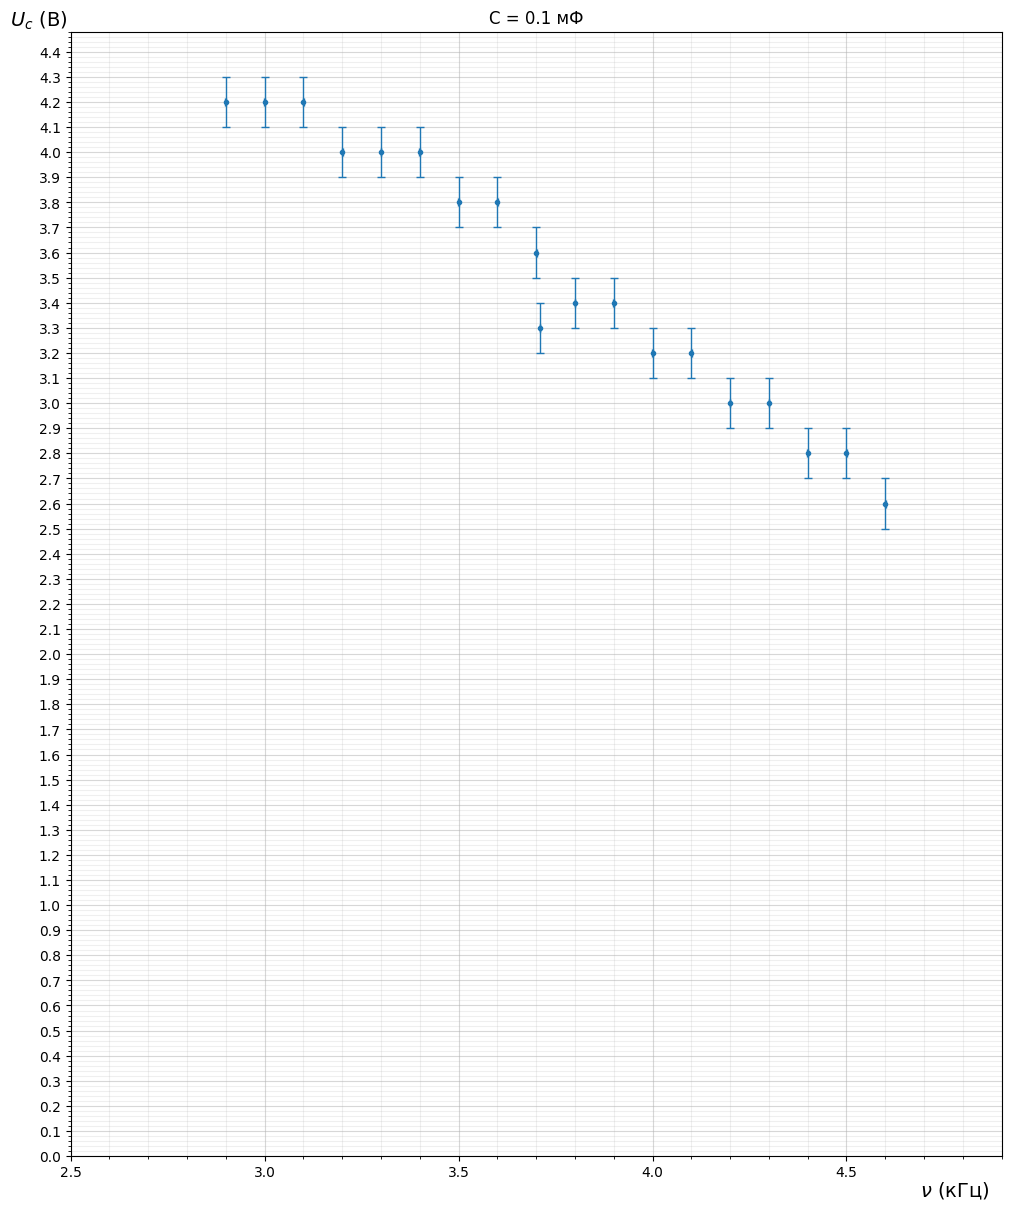

In [96]:
fig, ax = plt.subplots(figsize=(10, 12), layout='constrained')

ax.errorbar(f_i, U_c, yerr=delta_U_c, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_c$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 2.5, 5.0, 0.0, 4.5

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.1 мФ')
# ax.legend()

plt.show()

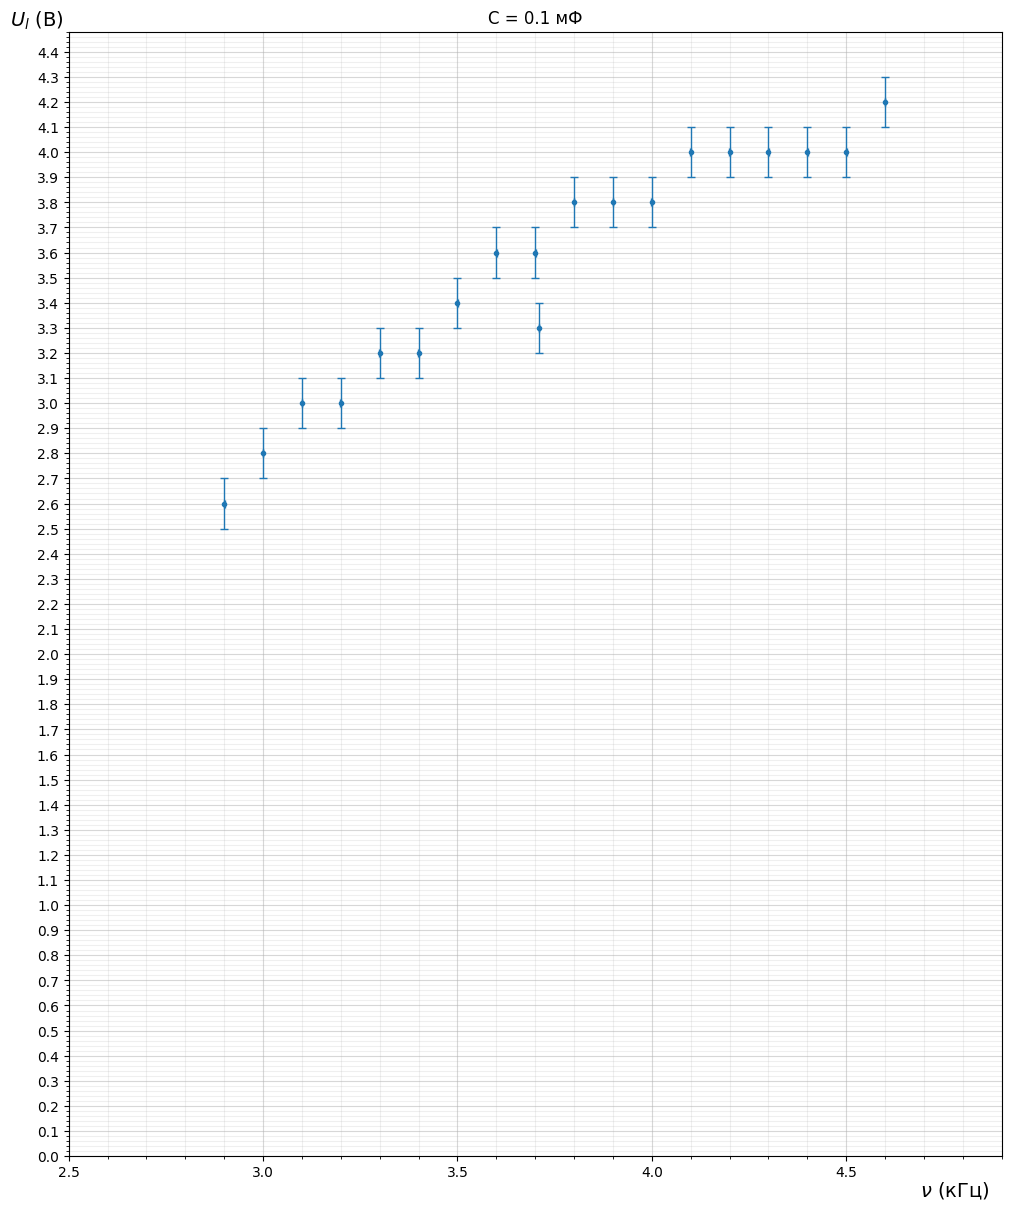

In [97]:
fig, ax = plt.subplots(figsize=(10, 12), layout='constrained')

ax.errorbar(f_i, U_l, yerr=delta_U_l, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_l$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 2.5, 5.0, 0.0, 4.5

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.1 мФ')
# ax.legend()

plt.show()

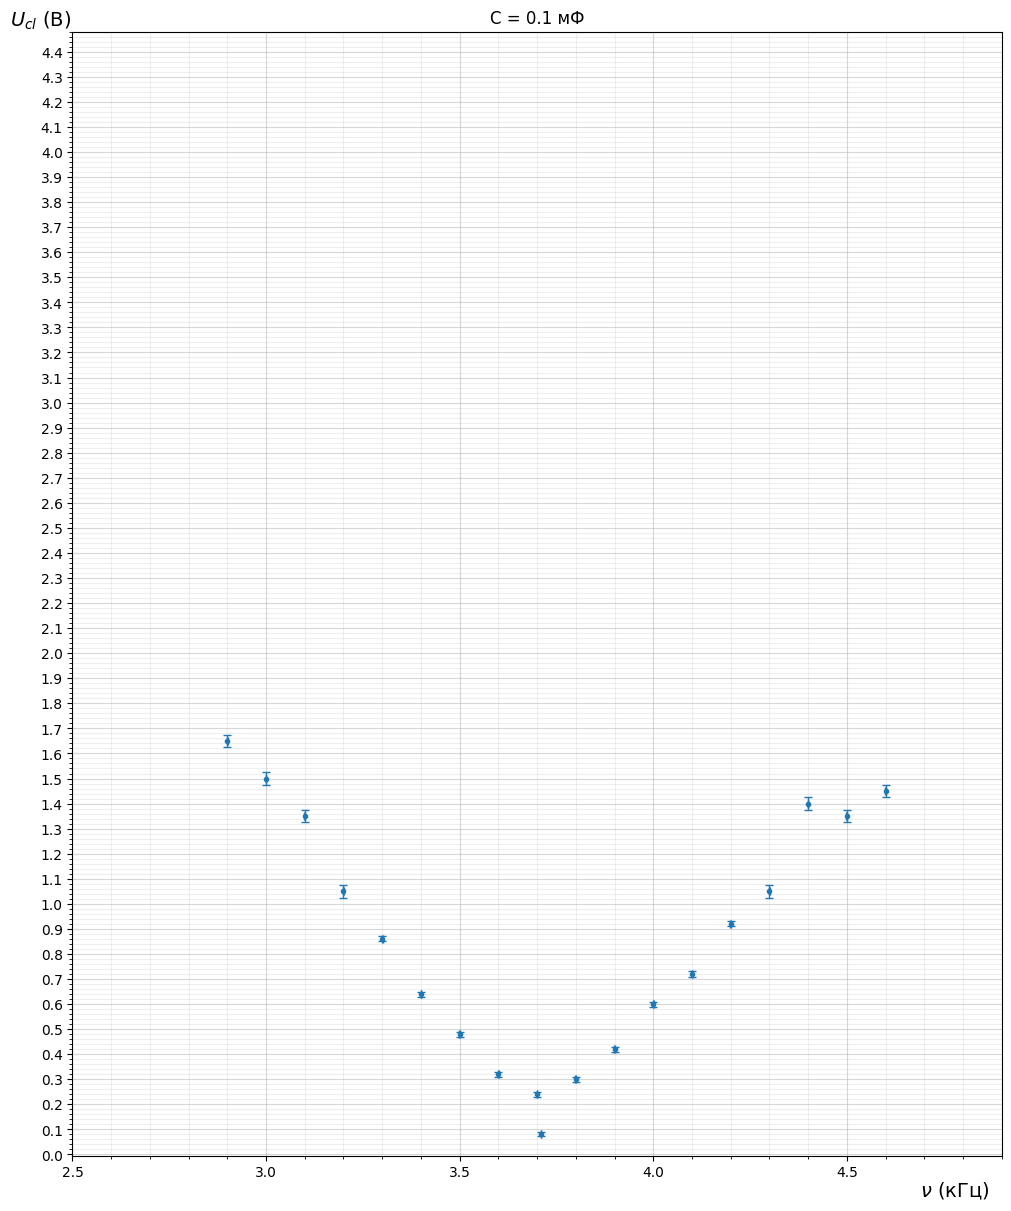

In [105]:
fig, ax = plt.subplots(figsize=(10, 12), layout='constrained')

ax.errorbar(f_i, U_cl, yerr=delta_U_cl, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_{{cl}}$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 2.5, 5.0, 0.0, 4.5

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.1 мФ')
# ax.legend()

plt.show()

In [106]:
C_2 = 0.2
f_i =    np.array([1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.64, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6])
delta_f_i = np.ones(22)*0.001


U_c =  np.array([3.6, 3.6, 3.4, 3.4, 3.2, 3.2, 3.0, 3.0, 2.8, 2.8, 27*3/30, 2.6, 26*3/30, 2.4, 2.4, 2.2, 2.2, 2.0, 2.0, 1.8, 1.8, 1.8])
delta_U_c = np.ones(22)*0.1

U_l =  np.array([13.5*3/30, 15*3/30, 1.6, 1.8, 14*3/30, 2.0, 2.2, 2.2, 2.4, 2.4, 26.5*3/30, 26.0*3/30, 27.5*3/30, 2.8, 2.8, 3.0, 3.0, 3.0, 3.2, 3.2, 3.2, 3.2])
delta_U_l = np.ones(22)*0.1

U_cl = np.array([23.0*3/30, 21*3/30, 18.5*3/30, 16.0*3/30, 14.0*3/30, 11.5*3/30, 9.6/10, 7.2/10, 5/10, 3.2/10, 17.5/30*.3, 15.5*0.3/30,
                20.0*0.3/30, 3.6/10, 5.2/10, 7.0/10, 8.6/10, 10.0*3/30, 11.5*3/30, 13.0*3/30, 14.5*3/30, 15.5*3/30])
delta_U_cl = np.array([0.1*3/30, 0.1*3/30, .1*3/30, .1*3/30, .1*3/30, .1*3/30, .1/10, .1/10, .1/10, .1/10, .1/30*.3, .1*0.3/30,
                .1*0.3/30, .1/10, .1/10, .1/10, .1/10, .1*3/30, .1*3/30, .1*3/30, .1*3/30, .1*3/30])

display(Markdown(rf'$C_2 = $ {C_2}'))
display(Markdown(rf'$f_i = $ {f}'))
display(Markdown(rf'$U_c = $ {U_c}'))
display(Markdown(rf'$U_l = $ {U_l}'))
display(Markdown(rf'$U_{{cl}} = $ {U_cl}'))

$C_2 = $ 0.2

$f_i = $ [1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.64 2.7  2.8
 2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6 ]

$U_c = $ [3.6 3.6 3.4 3.4 3.2 3.2 3.  3.  2.8 2.8 2.7 2.6 2.6 2.4 2.4 2.2 2.2 2.
 2.  1.8 1.8 1.8]

$U_l = $ [1.35 1.5  1.6  1.8  1.4  2.   2.2  2.2  2.4  2.4  2.65 2.6  2.75 2.8
 2.8  3.   3.   3.   3.2  3.2  3.2  3.2 ]

$U_{cl} = $ [2.3   2.1   1.85  1.6   1.4   1.15  0.96  0.72  0.5   0.32  0.175 0.155
 0.2   0.36  0.52  0.7   0.86  1.    1.15  1.3   1.45  1.55 ]

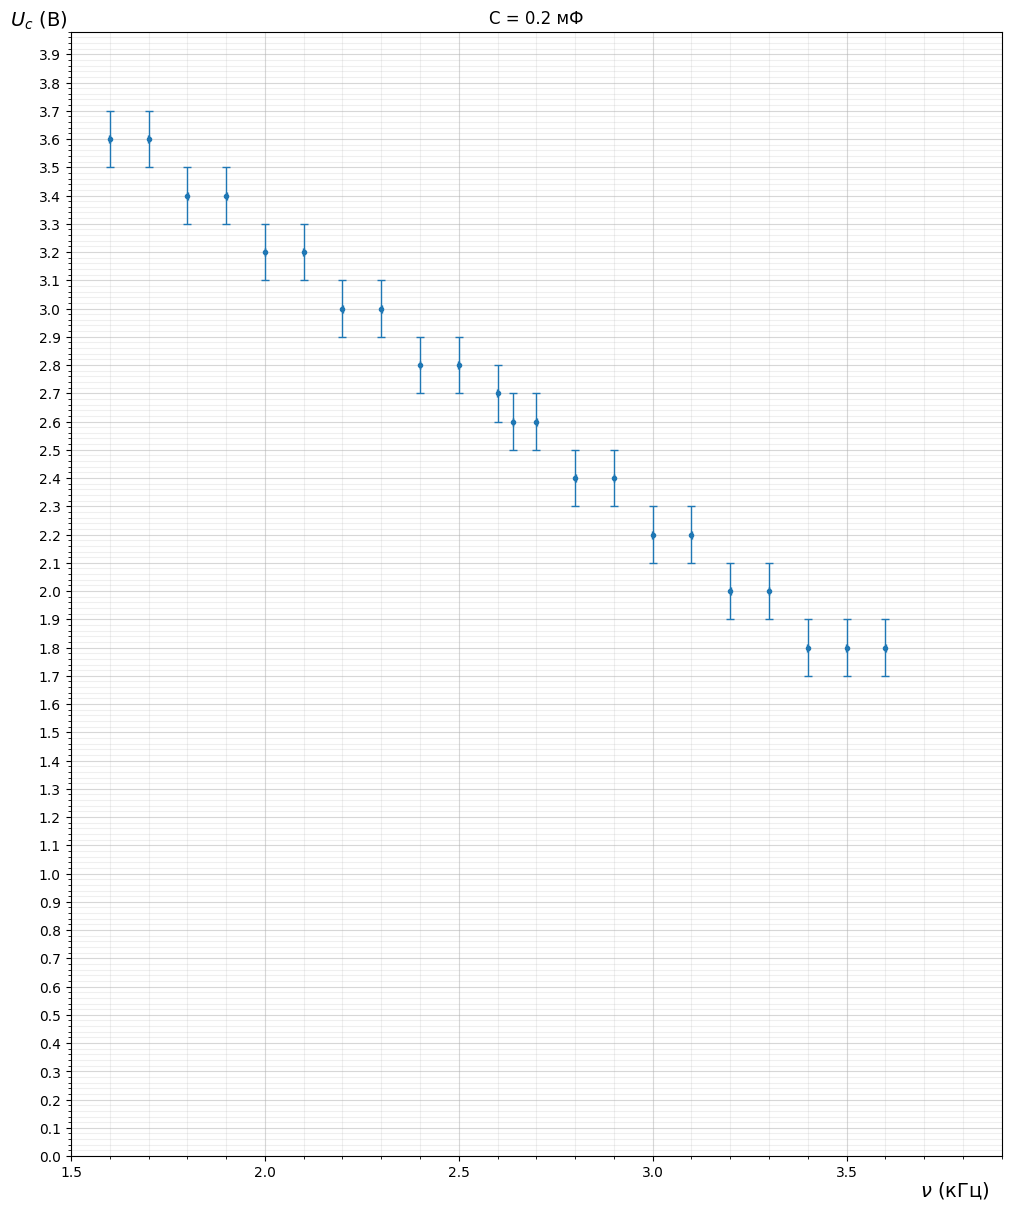

In [107]:
fig, ax = plt.subplots(figsize=(10, 12
                               ), layout='constrained')

ax.errorbar(f_i, U_c, yerr=delta_U_c, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_c$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 1.5, 4.0, 0.0, 4.0

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.2 мФ')
# ax.legend()

plt.show()

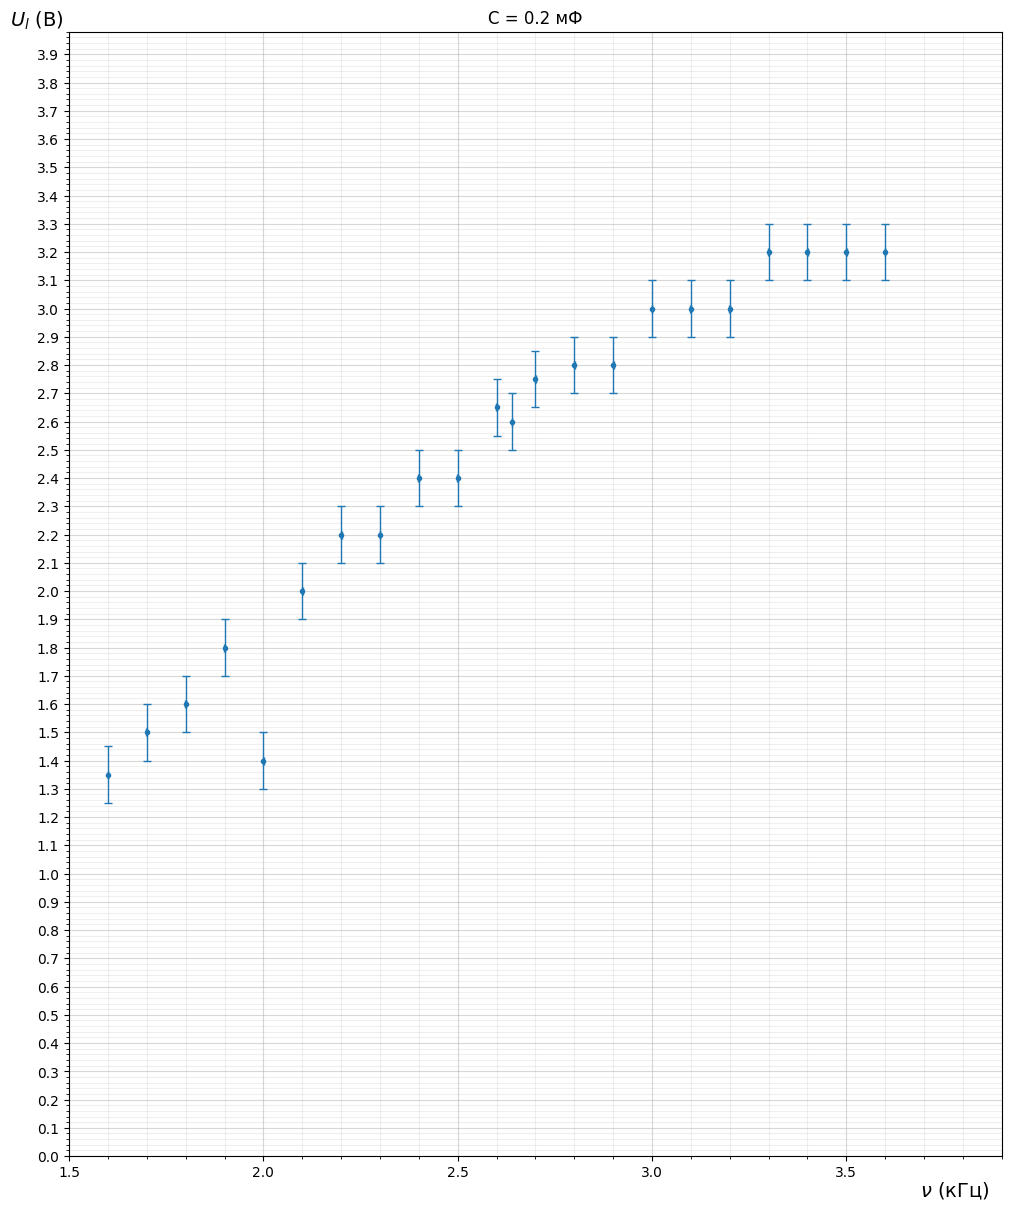

In [109]:
fig, ax = plt.subplots(figsize=(10, 12), layout='constrained')

ax.errorbar(f_i, U_l, yerr=delta_U_l, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_l$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 1.5, 4.0, 0.0, 4.0

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.2 мФ')
# ax.legend()

plt.show()

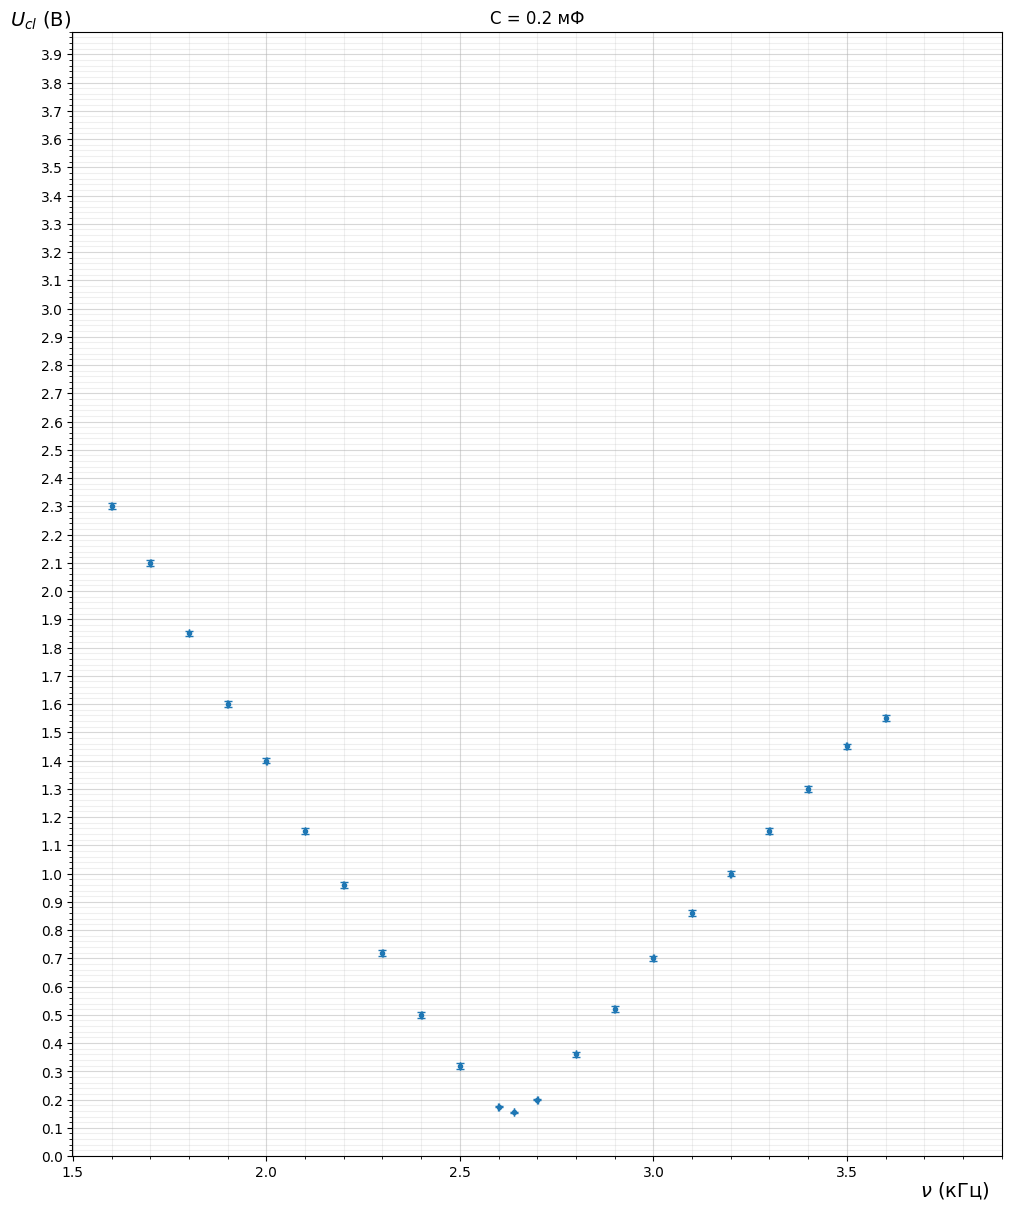

In [110]:
fig, ax = plt.subplots(figsize=(10, 12), layout='constrained')

ax.errorbar(f_i, U_cl, yerr=delta_U_cl, xerr=delta_f_i, fmt='.', linewidth=1, capsize=3)


# Рисуем оси
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
# ax.spines['left'].set_position('zero')

# Рисуем стрелочки
# arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
# ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(rf'$\nu$ (кГц)', size=14, labelpad=0, x=.95)
ax.set_ylabel(rf'$U_{{cl}}$ (В)', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 0.5, 0.1
xmin, xmax, ymin, ymax = 1.5, 4.0, 0.0, 4.0

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_title('C = 0.2 мФ')
# ax.legend()

plt.show()